In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

bases_vals.shape=(8, 255)
bases.shape=torch.Size([8, 255])


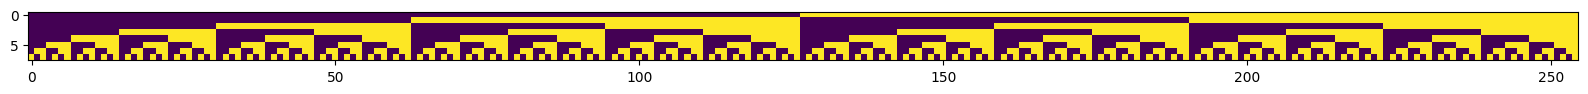

In [3]:
device = "cpu"


bases_vals = np.array([
    [c=="1" for c in f"{i:08b}"]
    for i in range(1, 256)
]).transpose()
bases = torch.from_numpy(bases_vals).float().to(device)
print(f"{bases_vals.shape=}")
print(f"{bases.shape=}")

plt.figure(figsize=(20, 10))
plt.imshow(bases_vals)

In [11]:
batch_size = 1


b = torch.tensor([0, 0, 1, 1, 0, 1, 0, 1]).tile((batch_size, 1)).unsqueeze(-1).float()
print(f"{b.shape = }")

b.shape = torch.Size([1, 8, 1])


In [12]:
a_mat = bases.unsqueeze(0).float()
print(f"{a_mat.shape = }")

a_mat.shape = torch.Size([1, 8, 255])


In [14]:
lstsq_soln = torch.linalg.lstsq(a_mat, b)
lstsq_soln

torch.return_types.linalg_lstsq(
solution=tensor([[[ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000],
         [ 0.0104],
         [-0.0052],
         [ 0.0052],
         [ 0.0000]

In [16]:
a_mat @ lstsq_soln.solution - b

tensor([[[ 3.3333e-01],
         [ 3.3333e-01],
         [-6.6667e-01],
         [-6.6667e-01],
         [ 3.3333e-01],
         [-6.6667e-01],
         [-5.5879e-09],
         [ 0.0000e+00]]])

soln = array([ 0.00868056, -0.00694444,  0.00173611,  0.00868056,  0.01736111,
        0.00173611,  0.01041667, -0.00694444,  0.00173611, -0.01388889,
       -0.00520833,  0.00173611,  0.01041667, -0.00520833,  0.00347222,
        0.00868056,  0.01736111,  0.00173611,  0.01041667,  0.01736111,
        0.02604167,  0.01041667,  0.01909722,  0.00173611,  0.01041667,
       -0.00520833,  0.00347222,  0.01041667,  0.01909722,  0.00347222,
        0.01215278,  0.00868056,  0.01736111,  0.00173611,  0.01041667,
        0.01736111,  0.02604167,  0.01041667,  0.01909722,  0.00173611,
        0.01041667, -0.00520833,  0.00347222,  0.01041667,  0.01909722,
        0.00347222,  0.01215278,  0.01736111,  0.02604167,  0.01041667,
        0.01909722,  0.02604167,  0.03472222,  0.01909722,  0.02777778,
        0.01041667,  0.01909722,  0.00347222,  0.01215278,  0.01909722,
        0.02777778,  0.01215278,  0.02083333, -0.00694444,  0.00173611,
       -0.01388889, -0.00520833,  0.00173611,  0.01041667

<BarContainer object of 255 artists>

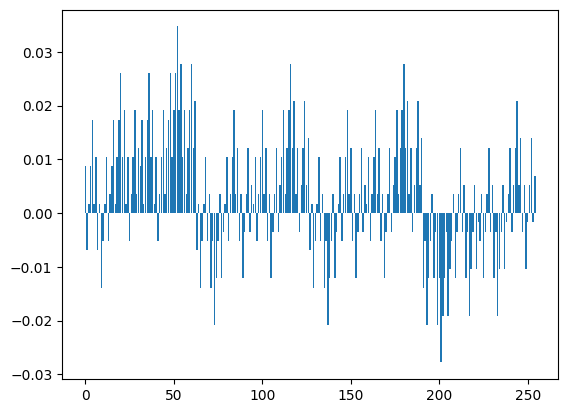

In [22]:
b_np = b[0, :, 0].cpu().numpy()
soln, residuals, rank, singular_vals = np.linalg.lstsq(bases_vals, b_np, rcond=None)
print(f"{soln = }")
print(f"{residuals = }")
print(f"{rank = }")
print(bases_vals @ soln - b_np)
plt.bar(np.arange(len(soln)), soln)

In [34]:
import cvxpy as cp


x = cp.Variable(255)
objective = cp.Minimize(cp.sum_squares(bases_vals @ x - b_np) + (cp.norm2(x) - 1)**2)
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print("residual: ", bases_vals @ x.value - b_np)
print("norm: ", np.linalg.norm(x.value))
plt.bar(np.arange(len(x.value)), x.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
power(Pnorm(var412, 2) + -1.0, 2.0)